# Bigmart Product Sales

##  Business understanding
### Project overview
The dataset of this project provides information about product attributes and store characteristics of 1559 products across 10 stores in different cities, collected in 2013 by data scientists at BigMart. By exploring and analyzing this dataset, we can understand which factors really drive product sales.

Data source: https://www.kaggle.com/datasets/thedevastator/bigmart-product-sales-factors

Meta data:

- Item_Weight: Weight of the product in kilograms
- Item_Fat_Content: The fat content of the product
- Item_Visibility: The visibility of the product in store
- Item_Type: The type of product
- Item_MRP: The maximum retail price of the product
- Outlet_Establishment_Year: The year the outlet was established
- Outlet_Size: The size of the outlet
- Outlet_Location_Type: The type of location of the outlet
- Outlet_Type: The type of outlet, such as grocery store or supermarket
- Item_Outlet_Sales: The sales of the product in the outlet

### Project Objective
Using the data to predict which factors have the biggest influence on product sales, and the optimal store set-up that would maximize product sales.
Target variable: Item_Outlet_Sales


## Data understanding

### Libraries used

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr,linregress,spearmanr,kendalltau


<div class="alert alert-block alert-info">
<b></b> Importing libraries, some libraries were imported while used during the coding.
</div>

### Data upload and data structure

In [2]:
# upload the dataset
bigmart=pd.read_csv('Bigmart_dataset.csv')
bigmart.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
bigmart.shape

(14204, 12)

<div class="alert alert-block alert-info">
<b></b> Dataset consist of 14204 rows and 12 columns.
</div>

In [4]:
# Checking the datatype of each column
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Exploratory data and data cleaning

#### Remove irrelevant variables

<div class="alert alert-block alert-info">
<b></b> As Item_Identifier and Outlet_Identifier are to identify the items and outlets, they have no relationship with the target variable which is item sales, hence they do not add value into the prediction. Therefore we will remove these 2 variables from the dataset.
</div>


In [5]:
# dropping variables
bigmart.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
# Shows number of rows and columns of the dataset
bigmart.shape

(14204, 10)

In [6]:
# drop duplicate rows (if any)
bigmart.drop_duplicates()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0             9.30          Low Fat         0.016047                  Dairy   
1             5.92          Regular         0.019278            Soft Drinks   
2            17.50          Low Fat         0.016760                   Meat   
3            19.20          Regular         0.000000  Fruits and Vegetables   
4             8.93          Low Fat         0.000000              Household   
...            ...              ...              ...                    ...   
14199        10.50          Regular         0.013496            Snack Foods   
14200         7.60          Regular         0.142991          Starchy Foods   
14201        10.00          Low Fat         0.073529     Health and Hygiene   
14202        15.30          Regular         0.000000                 Canned   
14203         9.50          Regular         0.104720                 Canned   

       Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0      249.8092                       1999      Medium               Tier 1   
1       48.2692                       2009      Medium               Tier 3   
2      141.6180                       1999      Medium               Tier 1   
3      182.0950                       1998         NaN               Tier 3   
4       53.8614                       1987        High               Tier 3   
...         ...                        ...         ...                  ...   
14199  141.3154                       1997       Small               Tier 1   
14200  169.1448                       2009      Medium               Tier 3   
14201  118.7440                       2002         NaN               Tier 2   
14202  214.6218                       2007         NaN               Tier 2   
14203   79.7960                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales  
0      Supermarket Type1        3735.138000  
1      Supermarket Type2         443.422800  
2      Supermarket Type1        2097.270000  
3          Grocery Store         732.380000  
4      Supermarket Type1         994.705200  
...                  ...                ...  
14199  Supermarket Type1        2213.476465  
14200  Supermarket Type2        2349.547110  
14201  Supermarket Type1        1892.981544  
14202  Supermarket Type1        4533.564958  
14203  Supermarket Type1        1302.235520  

[14204 rows x 10 columns]

<div class="alert alert-block alert-info">
<b></b> The database does not have duplicates
</div>

#### Creating new attribute

In [7]:
# add a new metric Outlet Age retrieved from Outlet establishment year
bigmart['Outlet_Age'] = bigmart.apply(lambda row: 2023 - row['Outlet_Establishment_Year'], axis=1)

In [8]:
bigmart.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

<div class="alert alert-block alert-info">
<b></b> As Outlet_Establishment_Year has the year of establishment of the stores, we decided that could be important column to use, so we created a new column Outlet_age to see the age of each store and use it in our model.
</div>

In [9]:
# check the dataset information again after dropping some attributes and creating a new one
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           11765 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Size           10188 non-null  object 
 6   Outlet_Location_Type  14204 non-null  object 
 7   Outlet_Type           14204 non-null  object 
 8   Item_Outlet_Sales     14204 non-null  float64
 9   Outlet_Age            14204 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.1+ MB


In [10]:
# Print value counts of new variable with cycle for to include all items in 1 step
categorical_cols_to_display = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for cdd in categorical_cols_to_display:
    print(f"Number of values in the {cdd} column is:\n{bigmart[cdd].value_counts() }")
    print("--" * 30)

Number of values in the Item_Fat_Content column is:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
------------------------------------------------------------
Number of values in the Outlet_Size column is:
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
------------------------------

<div class="alert alert-block alert-info">
<b>Observations:</b> <br>

1) Item_Fat_Content: There are two main categories: "Low Fat" and "Regular." "Low Fat" is more common than "Regular." There are also miscoded values such as LF, reg and low fat, these will be fixed in the next part.

2) Item_Type: Sixteen unique item types. "Fruits and Vegetables" and "Snack Foods" are the most common types. "Seafood" is the least common type.

3) Outlet_Size: There are three size categories: "Medium," "Small," and "High." "Medium" size outlets are the most common. "High" size outlets are the least common.

4) Outlet_Location_Type: We have three location tiers: "Tier 1," "Tier 2," and "Tier 3." "Tier 3" locations are the most common. "Tier 1" locations are the least common among the three tiers.

5) Outlet_Type: There are four outlet types: "Supermarket Type1," "Grocery Store," "Supermarket Type3," and "Supermarket Type2." "Supermarket Type1" is the most common outlet type. "Grocery Store" is the second most common.

We can have a better understanding doing some visualizations with this categorical variables.
</div>


In [11]:
# fixing miscoded values
bigmart['Item_Fat_Content'] = np.where(bigmart['Item_Fat_Content']=='LF','Low Fat', bigmart['Item_Fat_Content'])
bigmart['Item_Fat_Content'] = np.where(bigmart['Item_Fat_Content']=='low fat','Low Fat', bigmart['Item_Fat_Content'])
bigmart['Item_Fat_Content'] = np.where(bigmart['Item_Fat_Content']=='reg','Regular', bigmart['Item_Fat_Content'])

<div class="alert alert-block alert-info">
<b></b> Modifying the Fat content so "LF", "low fat" and "Low Fat" are the same. The same for "reg" and "Regular"
</div>

#### Checking missing values and value counts

In [12]:
# Detecting null values and sort them in descending order
bigmart.isnull().sum().sort_values(ascending=False)

Outlet_Size             4016
Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64

<div class="alert alert-block alert-info">
<b></b>
There are 2 variables with null values which are outlet size with 4016 out of 14204 rows (28.3%) and item weight with 2439 rows 14204 rows (17.2%)
</div>

### Fixing missing values

#### Item weight

In [13]:
bigmart['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

<div class="alert alert-block alert-info">
<b>Observation</b> Mean and median of this variable are pretty much the same, we might use mean imputation in this case. However, the number of missing values is too large (2439), using mean might cause spike in the distribution. To be safe, we will treat missing values of this column using values generated randomly from a normal distribution with same mean 12.79 and standard deviation 4.65
</div>

In [14]:
# replace missing value by a value generated randomly from a normal distribution with same mean and standard deviation
np.random.seed(42)
missing = np.isnan(bigmart['Item_Weight'])
num_missing = missing.sum()
imputed = np.random.normal(12.79, 4.65, num_missing)
bigmart.loc[missing, 'Item_Weight'] = imputed
# loc[] imputes missing cells with random values generated
bigmart['Item_Weight'].describe()

count    14204.000000
mean        12.818467
std          4.639358
min         -2.281893
25%          8.895000
50%         12.600000
75%         16.700000
max         30.705201
Name: Item_Weight, dtype: float64

#### Outlet size

<div class="alert alert-block alert-info">
<b></b> Replace null cells with 'missing'. 

In dataset, even though missing cells accounts for 28.3%, we still can remove the rows containing missing cells and keep 10188 records which are enough for prediction.
</div>

In [15]:
# replace missing values with 'Missing' then remove the rows with missing value
bigmart['Outlet_Size'].fillna('Missing', inplace=True)
size_missing = bigmart[bigmart['Outlet_Size'].str.contains('Missing')]
bigmart = bigmart[~bigmart['Outlet_Size'].str.contains('Missing')]

In [16]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10188 entries, 0 to 14200
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           10188 non-null  float64
 1   Item_Fat_Content      10188 non-null  object 
 2   Item_Visibility       10188 non-null  float64
 3   Item_Type             10188 non-null  object 
 4   Item_MRP              10188 non-null  float64
 5   Outlet_Size           10188 non-null  object 
 6   Outlet_Location_Type  10188 non-null  object 
 7   Outlet_Type           10188 non-null  object 
 8   Item_Outlet_Sales     10188 non-null  float64
 9   Outlet_Age            10188 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 875.5+ KB


### Remove negative values and outliers

#### Item Weight

In [17]:
# count number of outlier and negative values
Q1 = np.percentile(bigmart['Item_Weight'], 25)
Q3 = np.percentile(bigmart['Item_Weight'], 75)
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers1 = (bigmart['Item_Weight'] < lower_threshold) 
outliers2 = (bigmart['Item_Weight'] > upper_threshold)
print('number of small outlier: ',outliers1.value_counts())
print()
print('number of big outliers: ', outliers2.value_counts())
print()
# count number of negative values
negative = (bigmart['Item_Weight'] < 0)
print('number of negative values: ', negative.value_counts())

number of small outlier:  False    10188
Name: Item_Weight, dtype: int64

number of big outliers:  False    10187
True         1
Name: Item_Weight, dtype: int64

number of negative values:  False    10181
True         7
Name: Item_Weight, dtype: int64


In [18]:
# remove negative values
bigmart=bigmart[bigmart['Item_Weight']>=0]

In [19]:
# remove outliers
bigmart=bigmart[(bigmart['Item_Weight']> lower_threshold) & (bigmart['Item_Weight']< upper_threshold)]
fig=px.histogram(bigmart, x='Item_Weight',marginal='box',title="Distribution of Item weight")
fig.update_layout(bargap=0.1)
fig.show()

<div class="alert alert-block alert-info">
<b></b> 7 negative values and outliers were found and removed.
</div>

#### Item Visibility 

In [20]:
# count number of outliers of Item_Visibility
Q1, Q3 = np.percentile(bigmart['Item_Visibility'], [25, 75])
# Q3 = np.percentile(bigmart['Item_Visibility'], 75)
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers1 = (bigmart['Item_Visibility'] < lower_threshold)
outliers2 = (bigmart['Item_Visibility'] > upper_threshold)
print('number of small outlier: ',outliers1.value_counts())
print()
print('number of big outliers: ', outliers2.value_counts())

number of small outlier:  False    10180
Name: Item_Visibility, dtype: int64

number of big outliers:  False    10041
True       139
Name: Item_Visibility, dtype: int64


In [21]:
# remove outliers
bigmart=bigmart[(bigmart['Item_Visibility']> lower_threshold) & (bigmart['Item_Visibility']< upper_threshold)]
fig=px.histogram(bigmart, x='Item_Visibility',marginal='box',title="Distribution of Item Visibility")
fig.update_layout(bargap=0.1)
fig.show()

<div class="alert alert-block alert-info">
<b></b> For Item Visibility 139 outliers were found and fixed.
</div>

#### Item Outlet Sales

In [22]:
# count number of outliers in Item_Outlet_Sales
Q1, Q3 = np.percentile(bigmart['Item_Outlet_Sales'], [25, 75])
# Q3 = np.percentile(bigmart['Item_Visibility'], 75)
IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outliers1 = (bigmart['Item_Outlet_Sales'] < lower_threshold)
outliers2 = (bigmart['Item_Outlet_Sales'] > upper_threshold)
print('number of small outlier: ',outliers1.value_counts())
print()
print('number of big outliers: ', outliers2.value_counts())

number of small outlier:  False    10041
Name: Item_Outlet_Sales, dtype: int64

number of big outliers:  False    9820
True      221
Name: Item_Outlet_Sales, dtype: int64


<div class="alert alert-block alert-info">
<b></b> To reduce the impact of outliers in target variable sales, we decided to remove outliers of this variable as well.
</div>

In [23]:
# remove outliers
bigmart=bigmart[(bigmart['Item_Outlet_Sales']> lower_threshold) & (bigmart['Item_Outlet_Sales']< upper_threshold)]
fig=px.histogram(bigmart, x='Item_Outlet_Sales',marginal='box',title="Distribution of Item Outlet Sales")
fig.update_layout(bargap=0.1)
fig.show()

<div class="alert alert-block alert-info">
<b></b> For Outlet sales 221 outliers were found and fixed.
</div>

In [24]:
bigmart.describe()

Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales  \
count  9820.000000      9820.000000  9820.000000        9820.000000   
mean     12.828990         0.061805   139.254544        2146.428721   
std       4.611519         0.045215    61.366883        1376.455464   
min       0.219970         0.000000    31.290000          33.955800   
25%       8.930000         0.026427    93.180400        1042.309900   
50%      12.650000         0.052012   140.400900        1937.068345   
75%      16.617802         0.090114   184.100950        3018.277067   
max      27.380531         0.190337   266.888400        6144.681924   

        Outlet_Age  
count  9820.000000  
mean     26.925967  
std       8.785915  
min      14.000000  
25%      19.000000  
50%      26.000000  
75%      36.000000  
max      38.000000

<div class="alert alert-block alert-info">
<b>1) Item_Weight:</b> The average item weight is approximately 12.82 units and has a min of 0.21 and a max of 27.38 kg. The weights vary with a standard deviation of about 4.61 units.<br>
<b>2) Item_Visibility:</b> The mean visibility of items is approximately 0.061.There is moderate variation in visibility, with a standard deviation of about 0.045. In visibility values range we can observe that the most of the observations of Item_Visibility are in the range of 0.026 and 0.090.<br>
<b>3) Item_MRP:</b> The mean Maximum Retail Price (MRP) of items is approximately 139.25 units.Prices vary with a standard deviation of about 61.36 units.<br>
<b>5) Item_Outlet_Sales:</b> The mean sales amount is approximately 2,146.42. Sales amounts vary considerably with a standard deviation of about 1,376.45 units.<br>
<b>4) Outlet_Age:</b> The average outlet age is 26.9 with the minimum age is 14 and maximum age is 38.<br>
</div>

In [25]:
# Curtosis
kurtosis = bigmart.kurt(numeric_only=True)
kurtosis

Item_Weight         -1.014644
Item_Visibility     -0.233692
Item_MRP            -0.862551
Item_Outlet_Sales   -0.205352
Outlet_Age          -1.429804
dtype: float64

<div class="alert alert-block alert-info">

The results indicate that these distributions have lighter tails and a flatter peak compared to a normal distribution

In [26]:
#Skewness
skewness = bigmart.skew(numeric_only=True)
print (skewness)

Item_Weight          0.085496
Item_Visibility      0.740362
Item_MRP             0.153070
Item_Outlet_Sales    0.650256
Outlet_Age          -0.005411
dtype: float64


<div class="alert alert-block alert-info">
There is not much skewness in the numeric variables in this dataset, most of them are slightly positively skewed   
    </div>


In [27]:
# Create new variable that includes the numeric columns and run basic statistics
numeric_cols = bigmart.select_dtypes(include=['float64', 'int64']).columns.tolist()
print (numeric_cols)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']


In [28]:
# Correlation
correlation = bigmart[numeric_cols].corr()
print(correlation)

                   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.014924  0.027798           0.011567   
Item_Visibility      -0.014924         1.000000  0.001114          -0.044586   
Item_MRP              0.027798         0.001114  1.000000           0.636491   
Item_Outlet_Sales     0.011567        -0.044586  0.636491           1.000000   
Outlet_Age            0.008140         0.049476 -0.016358           0.045333   

                   Outlet_Age  
Item_Weight          0.008140  
Item_Visibility      0.049476  
Item_MRP            -0.016358  
Item_Outlet_Sales    0.045333  
Outlet_Age           1.000000  


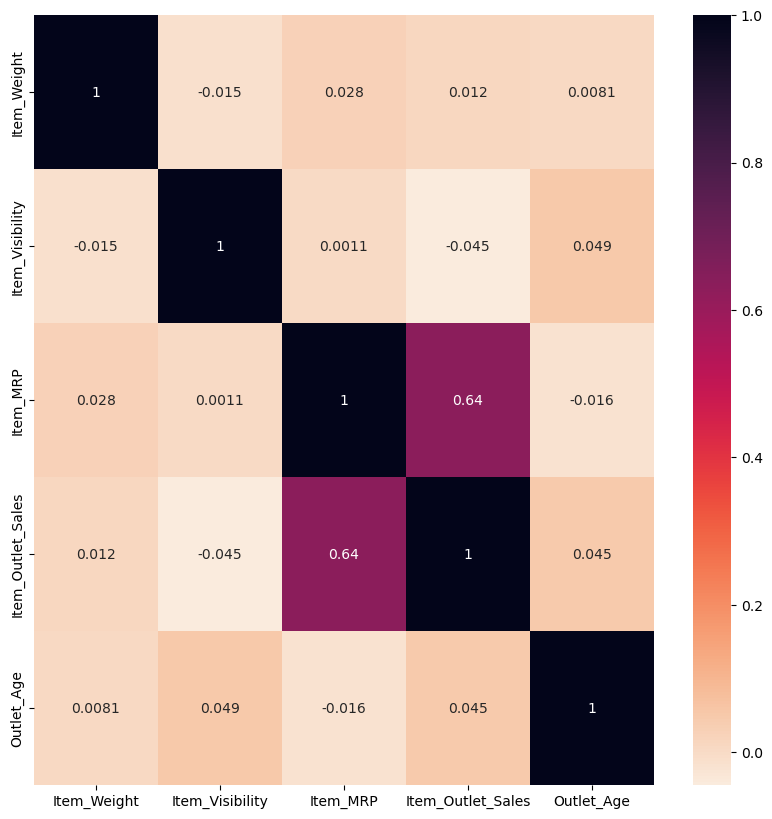

In [29]:
plt.figure(figsize=(10,10))
g=sns.heatmap(bigmart[numeric_cols].corr(),annot=True,cmap="rocket_r")

<div class="alert alert-block alert-info">
<b></b> The only varible that has correlation is the Item MRP that is the item's price.
</div>

### Visualization

Plotting Item_Weight distribution
Plotting Item_Visibility distribution
Plotting Item_MRP distribution
Plotting Item_Outlet_Sales distribution
Plotting Outlet_Age distribution


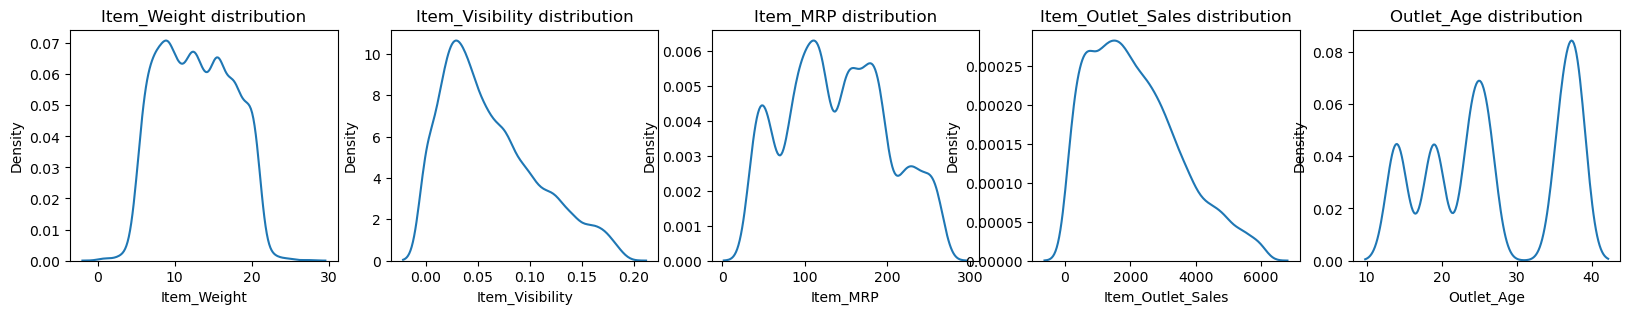

In [30]:
# Create subplots layout: 1 row, 5 columns
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))

# Iterate over numerical columns in numeric_cols
for index, col in enumerate(numeric_cols):
    print(f"Plotting {col} distribution")
    sns.kdeplot(data=bigmart, x=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

# Display the subplots
plt.show()

<div class="alert alert-block alert-info">
<b></b> From this chart we can see these distributions are either slightly skewed or not skewed and not normally distributed.
</div>

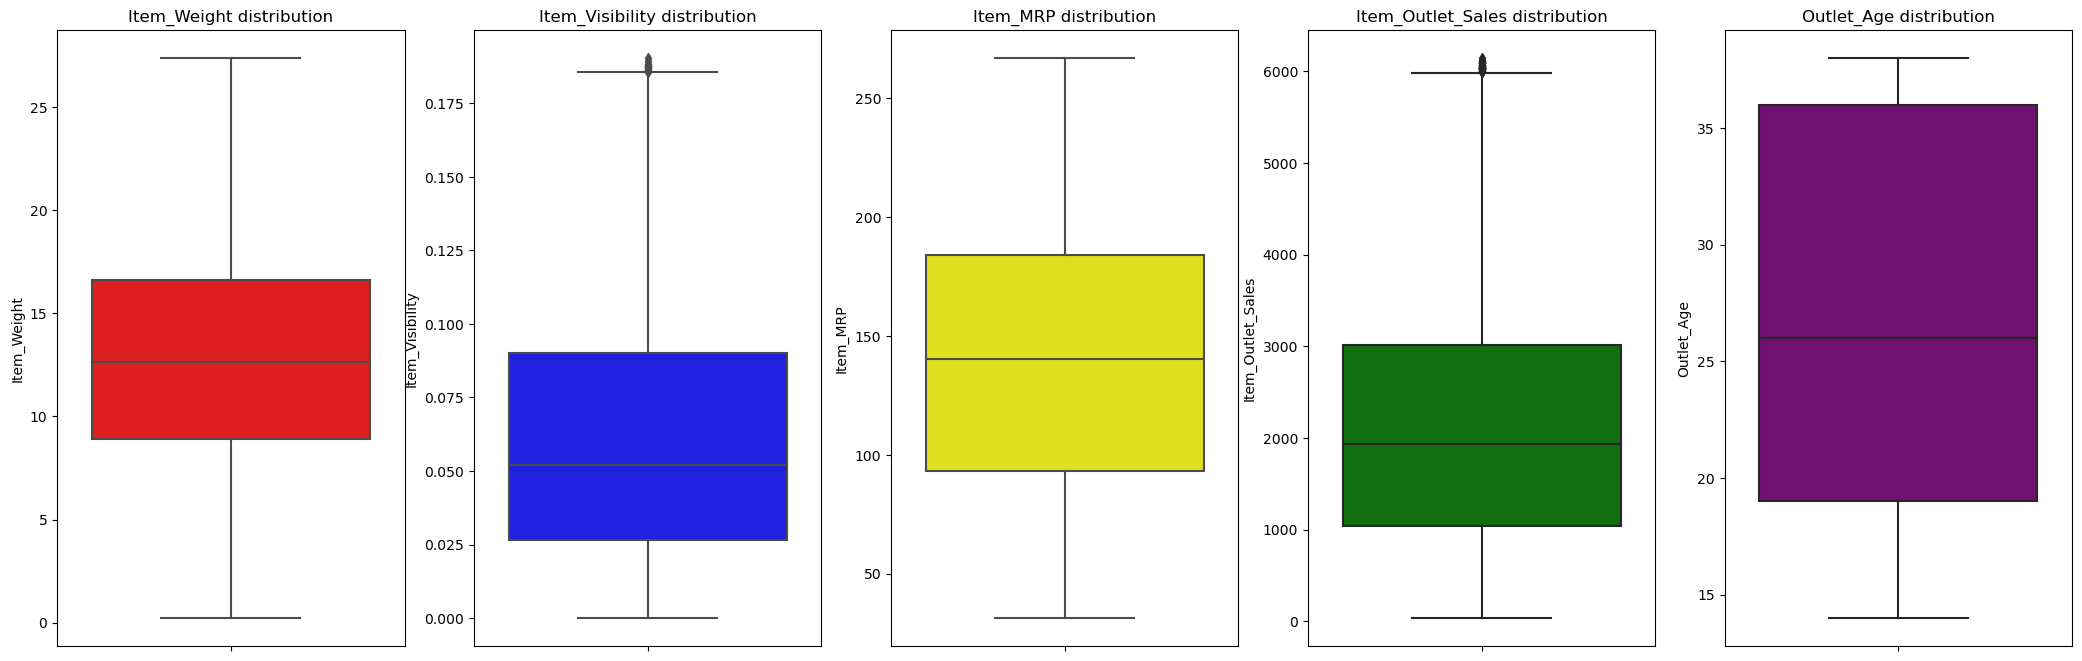

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
colors = ['red','blue','yellow','green','purple']
for index, (col, color) in enumerate(zip (numeric_cols, colors)):
    sns.boxplot(data=bigmart, y=col, ax=ax[index], color=color)
    ax[index].set_title(f'{col} distribution')

<div class="alert alert-block alert-info">
<b></b> With the boxplots we can see few outliers in Item visibility and Outlet sales.
</div>

<div class="alert alert-block alert-info">
<b></b> Now we are going to see the visualizations for each varible.
</div>

In [32]:
fig=px.histogram(bigmart, x='Item_Weight',marginal='box',title="Distribution of Item weight")
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
fig=px.histogram(bigmart, x='Item_Visibility',marginal='box',title="Distribution of Item visibility", color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
fig=px.histogram(bigmart, x='Item_MRP',marginal='box',title="Distribution of Item maximum retail price", color_discrete_sequence=['violet'])
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig=px.histogram(bigmart, x='Outlet_Age',marginal='box',title="Distribution of Outlet Age", color_discrete_sequence=['grey'])
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig=px.histogram(bigmart, x='Item_Outlet_Sales',marginal='box',title="Distribution of Item outlet sales", color_discrete_sequence=['orange'])
fig.update_layout(bargap=0.1)
fig.show()

### Categorical variables

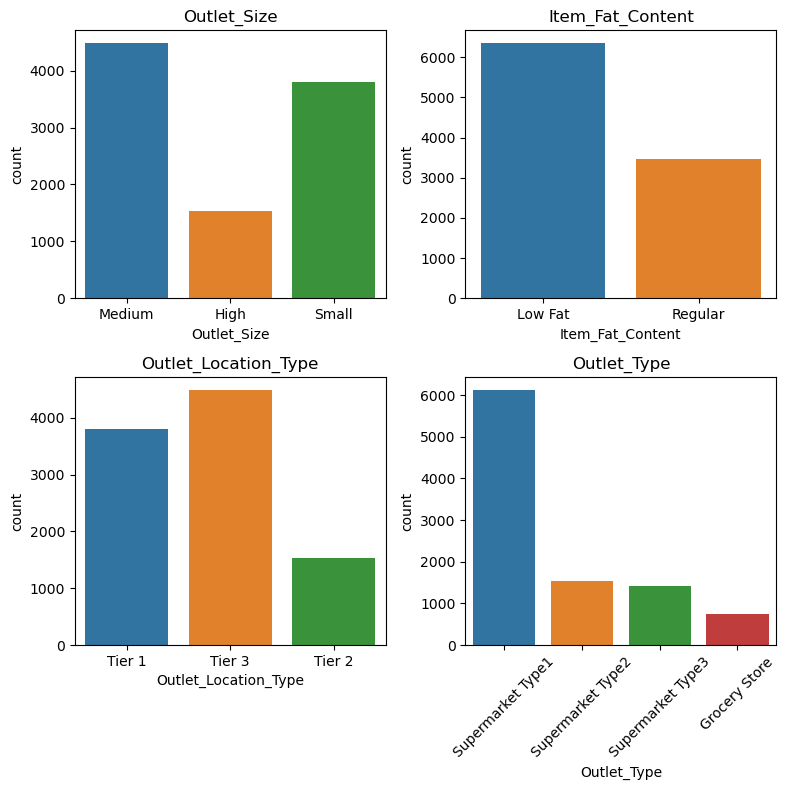

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.countplot(x = bigmart.Outlet_Size)
plt.title('Outlet_Size')
plt.subplot(222)
sns.countplot(x = bigmart.Item_Fat_Content)
plt.title('Item_Fat_Content')
plt.subplot(223)
sns.countplot(x = bigmart.Outlet_Location_Type)
plt.title('Outlet_Location_Type')
plt.subplot(224)
sns.countplot(x = bigmart.Outlet_Type)
plt.xticks(size=10, rotation=45)
plt.title('Outlet_Type')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Observation</b> <br>
<b></b> From the categorical visualizations, we can see that "Medium" is the more common feature in Outlet size, also "Low Fat" items are the more frequent one, and finally "Supermarket Type1" are the more repeated type of stores.
</div>

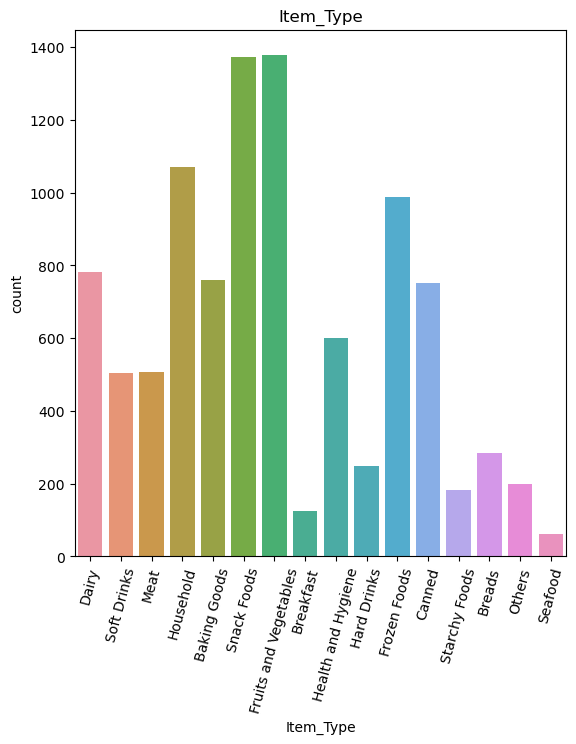

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(x = bigmart.Item_Type)
plt.tight_layout()
plt.xticks(size=10, rotation=75)
plt.title('Item_Type')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation</b> <br>
There are 16 different categories in the the Item_type feature. With the greater ones, Fruits and Vegetables, Snack foods and household.
</div>

# Feature selection

In [39]:
bigmart.head()

Item_Weight Item_Fat_Content  Item_Visibility     Item_Type  Item_MRP  \
0        9.300          Low Fat         0.016047         Dairy  249.8092   
1        5.920          Regular         0.019278   Soft Drinks   48.2692   
2       17.500          Low Fat         0.016760          Meat  141.6180   
4        8.930          Low Fat         0.000000     Household   53.8614   
5       10.395          Regular         0.000000  Baking Goods   51.4008   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0      Medium               Tier 1  Supermarket Type1          3735.1380   
1      Medium               Tier 3  Supermarket Type2           443.4228   
2      Medium               Tier 1  Supermarket Type1          2097.2700   
4        High               Tier 3  Supermarket Type1           994.7052   
5      Medium               Tier 3  Supermarket Type2           556.6088   

   Outlet_Age  
0          24  
1          14  
2          24  
4          36  
5          14

In [40]:
numeric_column = bigmart.select_dtypes(include=['float64', 'int64'])
features = bigmart[numeric_column.columns]
features.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Age
0        9.300         0.016047  249.8092          3735.1380          24
1        5.920         0.019278   48.2692           443.4228          14
2       17.500         0.016760  141.6180          2097.2700          24
4        8.930         0.000000   53.8614           994.7052          36
5       10.395         0.000000   51.4008           556.6088          14

In [41]:
X = features.drop(['Item_Outlet_Sales'], axis=1)
y = features['Item_Outlet_Sales'] 

<div class="alert alert-block alert-info">
<b></b> For feature selection, we selected all our numeric columns and divided in X and y to start with the different feature selection methods.
</div>

#### Filter method


In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

In [43]:
def cor_selector(X, y, num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    sorted_cor_list = sorted(enumerate(cor_list), key=lambda x: x[1], reverse=True)
    
    # Select the top num_features based on the sorted correlation values
    top_feature_indices = [index for index, _ in sorted_cor_list[:num_features]]
    cor_feature = [feature_name[i] for i in top_feature_indices]
    
    # Create a DataFrame for the selected features and their coefficients
    selected_features1 = pd.DataFrame({
        'Selected_Features': cor_feature,
        'Score': [cor_list[i] for i in top_feature_indices]
    })

    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, selected_features1

cor_support, selected_features1 = cor_selector(X, y, 5)
selected_features1['Ranking'] = selected_features1['Score'].abs().rank(ascending=False).astype(int)
selected_features1

Selected_Features     Score  Ranking
0          Item_MRP  0.636491        1
1        Outlet_Age  0.045333        2
2       Item_Weight  0.011567        4
3   Item_Visibility -0.044586        3

In [44]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
selected_features2 = pd.concat([dfcolumns,dfscores],axis=1)
selected_features2.columns = ['Selected_Features','Score']  #naming the dataframe columns
selected_features2=selected_features2.sort_values(by='Score', ascending=False)
selected_features2 = selected_features2.reset_index(drop=True)
selected_features2['Ranking'] = selected_features2['Score'].rank(ascending=False).astype(int)
selected_features2

Selected_Features        Score  Ranking
0          Item_MRP  6686.186959        1
1        Outlet_Age    20.218468        2
2   Item_Visibility    19.556105        3
3       Item_Weight     1.313779        4

#### Wrapper method

Backward method

In [45]:
import statsmodels.api as sm

# Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
# Fitting sm.OLS model
model = sm.OLS(y, X_1).fit()
# Backward Elimination
cols = list(X.columns)
pmax = 1
importance_rank = []  # List to store the importance ranking

while len(cols) > 0:
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    # Calculate feature importance based on p-values or any other measure
    importance = model.pvalues[1:]
    
    # Rank the importance, with the most important feature as 1
    ranked_importance = importance.rank(ascending=True, method='min').astype(int)
    
    # Find the most important feature in this step
    most_important_feature = ranked_importance.idxmin()
    
    importance_rank.append((cols[cols.index(most_important_feature)], cols.index(most_important_feature) + 1))
    
    pmax = max(importance)
    feature_with_p_max = most_important_feature
    
    if pmax > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

# Create a dataframe from the importance ranking
selected_feature3 = pd.DataFrame(importance_rank, columns=['Selected_Features', 'Ranking'])
selected_feature3 = selected_feature3.sort_values(by='Ranking')  # Sort by 'Ranking' column
selected_feature3['Ranking'] = selected_feature3['Ranking'].rank(ascending=True, method='min').astype(int)
selected_feature3

Selected_Features  Ranking
3       Item_Weight        1
2   Item_Visibility        2
0          Item_MRP        3
1        Outlet_Age        3

#### Embedded method

In [46]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)

# Calculate absolute coefficients
coef = pd.Series(reg.coef_, index=X.columns)
abs_coef = abs(coef)

# Sort the features by absolute coefficients in descending order
sorted_features = abs_coef.sort_values(ascending=False)

# Rank the features
ranked_features = sorted_features.rank(ascending=False).astype(int)
selected_feature4 = pd.DataFrame({'Selected_Features': sorted_features.index, 'Ranking': ranked_features[sorted_features.index]})
selected_feature4 = selected_feature4.reset_index(drop=True)
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
selected_feature4

Lasso picked 2 variables and eliminated the other 2 variables


Selected_Features  Ranking
0          Item_MRP        1
1        Outlet_Age        2
2       Item_Weight        3
3   Item_Visibility        3

In [47]:
feature_selected = pd.concat([selected_features1, selected_features2, selected_feature3, selected_feature4], ignore_index=False)
# feature_selected.reset_index(inplace=True)
# feature_selected.rename(columns={'index': 'Ranking'}, inplace=True)
feature_selected

Selected_Features        Score  Ranking
0          Item_MRP     0.636491        1
1        Outlet_Age     0.045333        2
2       Item_Weight     0.011567        4
3   Item_Visibility    -0.044586        3
0          Item_MRP  6686.186959        1
1        Outlet_Age    20.218468        2
2   Item_Visibility    19.556105        3
3       Item_Weight     1.313779        4
3       Item_Weight          NaN        1
2   Item_Visibility          NaN        2
0          Item_MRP          NaN        3
1        Outlet_Age          NaN        3
0          Item_MRP          NaN        1
1        Outlet_Age          NaN        2
2       Item_Weight          NaN        3
3   Item_Visibility          NaN        3

In [48]:
importance = feature_selected.groupby('Selected_Features')['Ranking'].sum().sort_values(ascending=True).reset_index()
importance_df = pd.DataFrame({'Selected_Features':importance['Selected_Features'], 'Sum_Ranking': importance['Ranking']})
importance_df

Selected_Features  Sum_Ranking
0          Item_MRP            6
1        Outlet_Age            9
2   Item_Visibility           11
3       Item_Weight           12

<div class="alert alert-block alert-info">
<b>Observation</b> <br>
For the small number of numerical columns and different testing we did in our Models, we decided we are going to use all the variables. We confirmed the outlet age is also important.
</div>

## Modeling - Data Preparation




In [49]:
bigmart_3 = bigmart.copy()
bigmart_3.head()

Item_Weight Item_Fat_Content  Item_Visibility     Item_Type  Item_MRP  \
0        9.300          Low Fat         0.016047         Dairy  249.8092   
1        5.920          Regular         0.019278   Soft Drinks   48.2692   
2       17.500          Low Fat         0.016760          Meat  141.6180   
4        8.930          Low Fat         0.000000     Household   53.8614   
5       10.395          Regular         0.000000  Baking Goods   51.4008   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0      Medium               Tier 1  Supermarket Type1          3735.1380   
1      Medium               Tier 3  Supermarket Type2           443.4228   
2      Medium               Tier 1  Supermarket Type1          2097.2700   
4        High               Tier 3  Supermarket Type1           994.7052   
5      Medium               Tier 3  Supermarket Type2           556.6088   

   Outlet_Age  
0          24  
1          14  
2          24  
4          36  
5          14

### Check normality and correct skewness

In [50]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import math

In [51]:
bigmart_3.skew(numeric_only=True)

Item_Weight          0.085496
Item_Visibility      0.740362
Item_MRP             0.153070
Item_Outlet_Sales    0.650256
Outlet_Age          -0.005411
dtype: float64

reference: http://www.learn-stat.com/what-is-shapiro-wilk-test/

#### Item_Visibility

<div class="alert alert-block alert-info">
<b></b>We are going to fix the skewness using shapiro method.
</div>

In [52]:
stat, p = shapiro(bigmart_3['Item_Visibility'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)


/Users/irvingcovarrubias/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



/var/folders/j_/17hfq_393_z27nrwb3vr52qh0000gn/T/ipykernel_14230/3824443544.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




0.6646843692478374

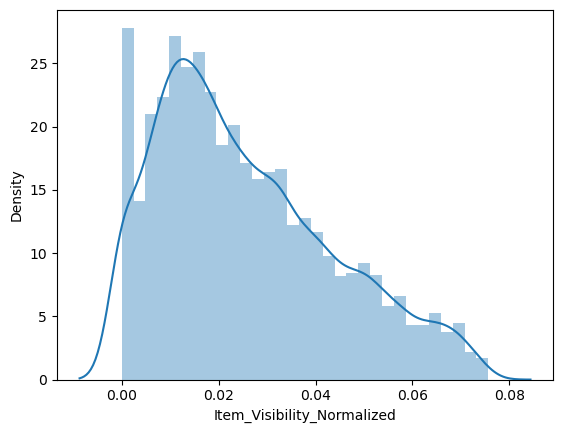

In [53]:
import math
bigmart_3['Item_Visibility_Normalized']=bigmart_3.apply(lambda x: math.log10(1+ abs(x['Item_Visibility'])), axis=1)
sns.distplot(bigmart_3['Item_Visibility_Normalized'], bins='auto');
bigmart_3['Item_Visibility_Normalized'].skew()

In [54]:
bigmart_3.skew(numeric_only=True)

Item_Weight                   0.085496
Item_Visibility               0.740362
Item_MRP                      0.153070
Item_Outlet_Sales             0.650256
Outlet_Age                   -0.005411
Item_Visibility_Normalized    0.664684
dtype: float64

In [55]:
bigmart_3 = bigmart_3.drop('Item_Visibility', axis=1)

<div class="alert alert-block alert-info">
<b></b>We are dropping Item_Visibility since we created another column with this variable normalized.
</div>

In [56]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = bigmart_3.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Item_Outlet_Sales']
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the numerical columns
bigmart_3[numerical_cols] = scaler.fit_transform(bigmart_3[numerical_cols])

bigmart_3.head()


Item_Weight Item_Fat_Content     Item_Type  Item_MRP Outlet_Size  \
0     0.334309          Low Fat         Dairy  0.927507      Medium   
1     0.209864          Regular   Soft Drinks  0.072068      Medium   
2     0.636218          Low Fat          Meat  0.468288      Medium   
4     0.320687          Low Fat     Household  0.095805        High   
5     0.374625          Regular  Baking Goods  0.085361      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Outlet_Age  \
0               Tier 1  Supermarket Type1          3735.1380    0.416667   
1               Tier 3  Supermarket Type2           443.4228    0.000000   
2               Tier 1  Supermarket Type1          2097.2700    0.416667   
4               Tier 3  Supermarket Type1           994.7052    0.916667   
5               Tier 3  Supermarket Type2           556.6088    0.000000   

   Item_Visibility_Normalized  
0                    0.091369  
1                    0.109591  
2                    0.095394  
4                    0.000000  
5                    0.000000

<div class="alert alert-block alert-info">
<b></b>All the numeric variables are now in the range of 0 to 1.
</div>

## Model training

In [57]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [58]:
categorical_cols = bigmart_3.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [59]:
X = pd.get_dummies(bigmart_3.drop('Item_Outlet_Sales', axis=1), columns=categorical_cols, dtype=int)
y = bigmart_3['Item_Outlet_Sales']

X_train_3, X_test_3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(X_train_3.shape)
print(X_test_3.shape)

(7856, 32)
(1964, 32)


<div class="alert alert-block alert-info">
<b></b> We converted our categorical variables into dummies variables for our models regressors, and use the train test split to divide our data in train and test.
</div>

In [61]:
X_train_3.head()

Item_Weight  Item_MRP  Outlet_Age  Item_Visibility_Normalized  \
1024     0.593877  0.960849    0.500000                    0.166556   
2377     0.446605  0.703114    0.500000                    0.190565   
11       0.673036  0.478867    0.500000                    0.255173   
6200     0.400582  0.511661    0.916667                    0.333325   
151      0.501832  0.552767    0.000000                    0.147326   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
1024                         1                         0   
2377                         0                         1   
11                           0                         1   
6200                         1                         0   
151                          0                         1   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
1024                       0                 0                    0   
2377                       0                 0                    0   
11                         0                 0                    0   
6200                       0                 0                    0   
151                        0                 0                    0   

      Item_Type_Canned  ...  Outlet_Size_High  Outlet_Size_Medium  \
1024                 0  ...                 0                   0   
2377                 0  ...                 0                   0   
11                   0  ...                 0                   0   
6200                 0  ...                 1                   0   
151                  0  ...                 0                   1   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
1024                  1                            1   
2377                  1                            1   
11                    1                            1   
6200                  0                            0   
151                   0                            0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
1024                            0                            0   
2377                            0                            0   
11                              0                            0   
6200                            0                            1   
151                             0                            1   

      Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
1024                          0                              1   
2377                          0                              1   
11                            0                              1   
6200                          0                              1   
151                           0                              0   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
1024                              0                              0  
2377                              0                              0  
11                                0                              0  
6200                              0                              0  
151                               1                              0  

[5 rows x 32 columns]

<div class="alert alert-block alert-info">
<b></b> After applied dummy function, we have 32 columns.
</div>

### Linear Regression

In [62]:
regressor = LinearRegression()
regressor.fit(X_train_3, y_train) #training the algorithm
y_pred_dt_test = regressor.predict(X_test_3)
y_pred_dt_train = regressor.predict(X_train_3)

lnr_mse_3 = metrics.mean_squared_error(y_test, y_pred_dt_test)
lnr_rmse_3 = np.sqrt(lnr_mse_3)
lnr_rsquared_train_3 = r2_score(y_train, y_pred_dt_train)
lnr_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)

print('MSE mean square error value: %.2f' % lnr_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % lnr_rmse_3)
print('R-squared (training data): %.2f' % lnr_rsquared_train_3)
print('R-squared (testing data): %.2f' % lnr_rsquared_test_3)

MSE mean square error value: 669845.32
RMSE Root Mean Squared Error: 818.44
R-squared (training data): 0.65
R-squared (testing data): 0.66


<div class="alert alert-block alert-info">
<b>Observation</b> <br>
We used Linear Regression model to see the relationship between dependent and independent variables. We got R-squared 0.65 in training data and 0.66 in testing data, these are slower we will continue using other models to see if we get a better R-squared.
</div>

### Regression Tree

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

In [65]:
from sklearn.metrics import r2_score

# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
max_depth = 6
regressor_dt = DecisionTreeRegressor( random_state = 42, max_depth=max_depth)
# regressor_dt = DecisionTreeRegressor(random_state = 0, max_depth=max_depth)
regressor_dt.fit(X_train_3, y_train)

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train_3, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train_3)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test_3)

rt_mse_3 = mean_squared_error(y_test, y_pred_dt_test)
rt_rmse_3 = np.sqrt(rt_mse_3)
rt_rsquared_train_3 = r2_score(y_train, y_pred_dt_train)
rt_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)

print('MSE mean square error value: %.2f' % rt_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % rt_rmse_3)
print('R-squared (training data): %.2f' % rt_rsquared_train_3)
print('R-squared (testing data): %.2f' % rt_rsquared_test_3)

MSE mean square error value: 643942.78
RMSE Root Mean Squared Error: 802.46
R-squared (training data): 0.69
R-squared (testing data): 0.67


<div class="alert alert-block alert-info">
<b>Observation</b> <br>
We used Decision Tree Regressor to see if we get a better result, initially we got similar results, so we started modifying the hyperparameters and with this got better values in our R-squared in training and testing data.
</div>

### Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
# choose the optimal alpha value
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train_3, y_train)
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)
lasso = Lasso(alpha=optimal_alpha)
lasso.fit(X_train_3, y_train)
y_pred_dt_test = lasso.predict(X_test_3)
y_pred_dt_train = lasso.predict(X_train_3)

lasso_mse_3 = mean_squared_error(y_test, y_pred_dt_test)
lasso_rmse_3 = np.sqrt(lasso_mse_3)
lasso_rsquared_train_3 = r2_score(y_train, y_pred_dt_train)
lasso_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)

print('MSE mean square error value: %.2f' % lasso_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % lasso_rmse_3)
print('R-squared (training data): %.2f' % lasso_rsquared_train_3)
print('R-squared (testing data): %.2f' % lasso_rsquared_test_3)

Optimal alpha: 1.0
MSE mean square error value: 665885.29
RMSE Root Mean Squared Error: 816.02
R-squared (training data): 0.65
R-squared (testing data): 0.66


<div class="alert alert-block alert-info">
<b></b>A higher alpha value results in stronger regularization, which, in turn, leads to a greater degree of feature selection (i.e., setting some coefficients to zero). Conversely, a lower alpha value means less regularization and allows the model to fit the training data more closely.
</div>

### Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_depth=6, min_samples_leaf=2, min_samples_split=2)
rf.fit(X_train_3, y_train)
y_pred_dt_test = rf.predict(X_test_3)
y_pred_dt_train = rf.predict(X_train_3)

rf_mse_3 = mean_squared_error(y_test, y_pred_dt_test)
rf_rmse_3 = np.sqrt(rf_mse_3)
rf_rsquared_train_3 = r2_score(y_train, y_pred_dt_train)
rf_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)

print('MSE mean square error value: %.2f' % rf_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % rf_rmse_3)
print('R-squared (training data): %.2f' % rf_rsquared_train_3)
print('R-squared (testing data): %.2f' % rf_rsquared_test_3)

MSE mean square error value: 620303.80
RMSE Root Mean Squared Error: 787.59
R-squared (training data): 0.70
R-squared (testing data): 0.68


<div class="alert alert-block alert-info">
<b>Observation</b> <br>
Initially Random Forest gave us a larger result in the R-squared of the training data (more than 0.90), but with testing data got a lower result, so we decided to set new hyperparameters, especially the max_depth, with this we correct the overfitting of the model. And also, we increased the R-squared compared to previous models.
</div>

### KNN Regressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 8)
knr.fit(X_train_3, y_train)
y_pred_dt_test = knr.predict(X_test_3)
y_pred_dt_train = knr.predict(X_train_3)

knr_mse_3 = mean_squared_error(y_test, y_pred_dt_test)
knr_rmse_3 = np.sqrt(knr_mse_3)
knr_rsquared_train_3 = r2_score(y_train, y_pred_dt_train)
knr_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)

print('MSE mean square error value: %.2f' % knr_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % knr_rmse_3)
print('R-squared (training data): %.2f' % knr_rsquared_train_3)
print('R-squared (testing data): %.2f' % knr_rsquared_test_3)

MSE mean square error value: 796847.21
RMSE Root Mean Squared Error: 892.66
R-squared (training data): 0.69
R-squared (testing data): 0.59


<div class="alert alert-block alert-info">
<b>Observation</b> <br>
With KNN we could not get a better result in our R-squared, even got a lower result with the testing data.
</div>

### XGB Regressor

In [69]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
xgb = XGBRegressor(gamma=0,
                            learning_rate=0.1,
                            max_depth=3,
                            min_child_weight=4)
xgb.fit(X_train_3, y_train) 

#Make predictions using regression model
y_pred_dt_test = xgb.predict(X_test_3)
y_pred_dt_train = xgb.predict(X_train_3)

xgb_rsquared_train_3 = r2_score(y_train,y_pred_dt_train)
xgb_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)
xgb_mse_3 = mean_squared_error(y_test, y_pred_dt_test)
xgb_rmse_3 = np.sqrt(xgb_mse_3)

#Print results 
print('MSE mean square error value: %.2f' % xgb_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % xgb_rmse_3)
print('R-squared (training data): %.2f' % xgb_rsquared_train_3)
print('R-squared (testing data): %.2f' % xgb_rsquared_test_3)

MSE mean square error value: 613799.71
RMSE Root Mean Squared Error: 783.45
R-squared (training data): 0.71
R-squared (testing data): 0.69


<div class="alert alert-block alert-info">
<b>Observation</b> <br>
After setting new hyperparameters, we got a better result in our R-squared.
</div>

### CatBoost Regressor

In [70]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create and train the CatBoost Regressor
cb = CatBoostRegressor(iterations=100,
                                   depth=6,
                                   learning_rate=0.1)

cb.fit(X_train_3, y_train)

y_pred_dt_test = cb.predict(X_test_3)
y_pred_dt_train = cb.predict(X_train_3)

cb_rsquared_train_3 = r2_score(y_train,y_pred_dt_train)
cb_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)
cb_mse_3 = mean_squared_error(y_test, y_pred_dt_test)
cb_rmse_3 = np.sqrt(cb_mse_3)

#Print results 
print('MSE mean square error value: %.2f' % cb_mse_3)
print('RMSE Root Mean Squared Error: %.2f' % cb_rmse_3)
print('R-squared (training data): %.2f' % cb_rsquared_train_3)
print('R-squared (testing data): %.2f' % cb_rsquared_test_3)

0:	learn: 1286.0728471	total: 60.4ms	remaining: 5.98s
1:	learn: 1212.5939849	total: 62.1ms	remaining: 3.04s
2:	learn: 1147.7494255	total: 63.5ms	remaining: 2.05s
3:	learn: 1090.5313307	total: 65.3ms	remaining: 1.57s
4:	learn: 1039.9650248	total: 66.9ms	remaining: 1.27s
5:	learn: 1005.0018689	total: 67.7ms	remaining: 1.06s
6:	learn: 968.1374011	total: 69.2ms	remaining: 920ms
7:	learn: 938.9354483	total: 71ms	remaining: 816ms
8:	learn: 912.1334246	total: 72.5ms	remaining: 733ms
9:	learn: 889.3216942	total: 74ms	remaining: 666ms
10:	learn: 871.3532926	total: 75.5ms	remaining: 611ms
11:	learn: 854.3602866	total: 77.2ms	remaining: 566ms
12:	learn: 840.4151719	total: 78.7ms	remaining: 527ms
13:	learn: 829.3801804	total: 80.3ms	remaining: 494ms
14:	learn: 820.4016858	total: 82.1ms	remaining: 465ms
15:	learn: 812.0761161	total: 83.6ms	remaining: 439ms
16:	learn: 805.6800236	total: 85ms	remaining: 415ms
17:	learn: 800.7519419	total: 86.4ms	remaining: 393ms
18:	learn: 795.2853219	total: 87.9ms	r

<div class="alert alert-block alert-info">
<b>Observation</b> <br>
After setting new hyperparameters, we got a better result in our R-squared. And also, we reduced our MSE and RMSE.
</div>

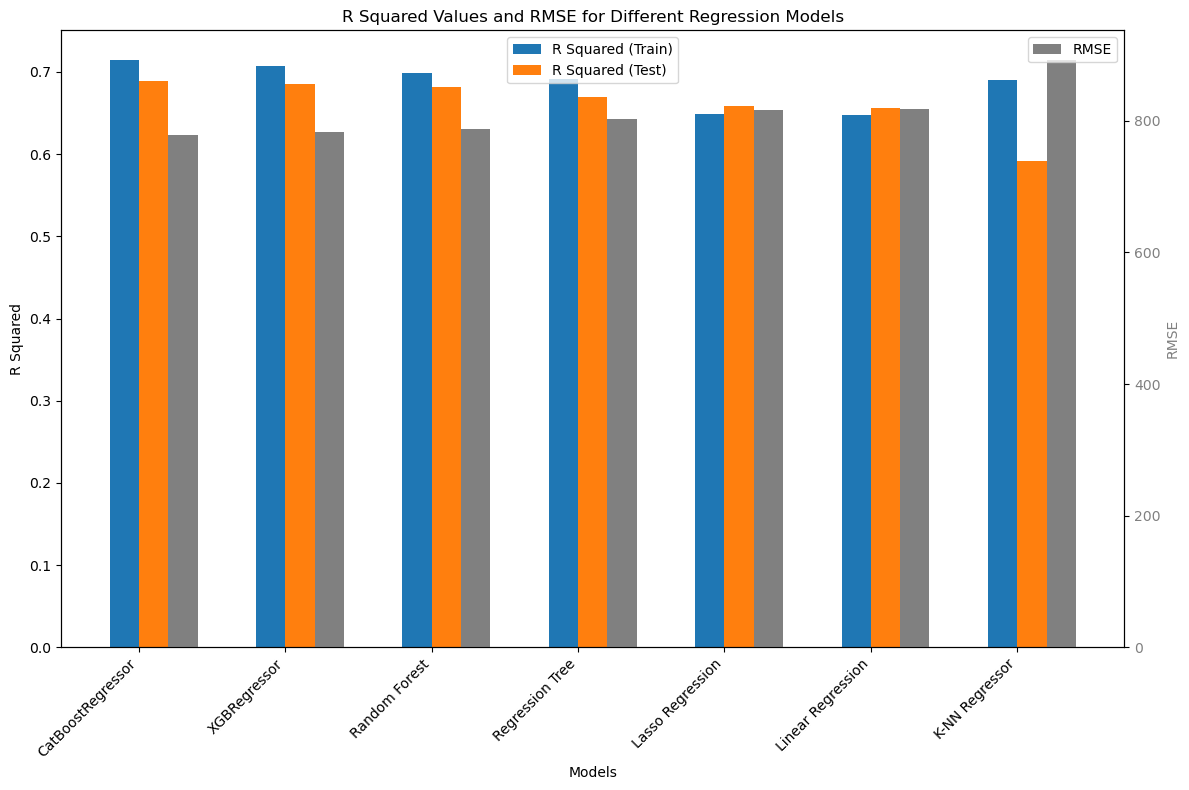

In [71]:

# Data
models = ['Linear Regression', 'Regression Tree', 'Lasso Regression', 'Random Forest', 'K-NN Regressor', 'XGBRegressor', 'CatBoostRegressor']
r_squared_train = [lnr_rsquared_train_3, rt_rsquared_train_3, lasso_rsquared_train_3, rf_rsquared_train_3, knr_rsquared_train_3, xgb_rsquared_train_3, cb_rsquared_train_3]
r_squared_test = [lnr_rsquared_test_3, rt_rsquared_test_3, lasso_rsquared_test_3, rf_rsquared_test_3, knr_rsquared_test_3, xgb_rsquared_test_3, cb_rsquared_test_3]
rmse_values = [lnr_rmse_3, rt_rmse_3, lasso_rmse_3, rf_rmse_3, knr_rmse_3, xgb_rmse_3, cb_rmse_3]

# Sorting by R Squared (Test) in descending order
sorted_indices = np.argsort(r_squared_test)[::-1]
models = np.array(models)[sorted_indices]
r_squared_train = np.array(r_squared_train)[sorted_indices]
r_squared_test = np.array(r_squared_test)[sorted_indices]
rmse_values = np.array(rmse_values)[sorted_indices]

# Plotting
bar_width = 0.2
index = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(12, 8))

# Creating bars for R-squared (Train) and R-squared (Test)
bar1 = ax1.bar(index - 0.5 * bar_width, r_squared_train, bar_width, label='R Squared (Train)')
bar2 = ax1.bar(index + 0.5 * bar_width, r_squared_test, bar_width, label='R Squared (Test)')

ax1.set_xlabel('Models')
ax1.set_ylabel('R Squared')
ax1.set_title('R Squared Values and RMSE for Different Regression Models')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()

# Creating a secondary y-axis for RMSE
ax2 = ax1.twinx()
bar3 = ax2.bar(index + 1.5 * bar_width, rmse_values, bar_width, label='RMSE', color='gray')

ax2.set_ylabel('RMSE', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation</b> <br>
After creating this visualization featuring all our models, we have reached the conclusion that the optimal choice for our project is the CatBoost Regressor. This particular model gives the highest R-squared values for both our training and testing data, and additionally, it provides the lowest Root Mean Squared Error (RMSE).
</div>


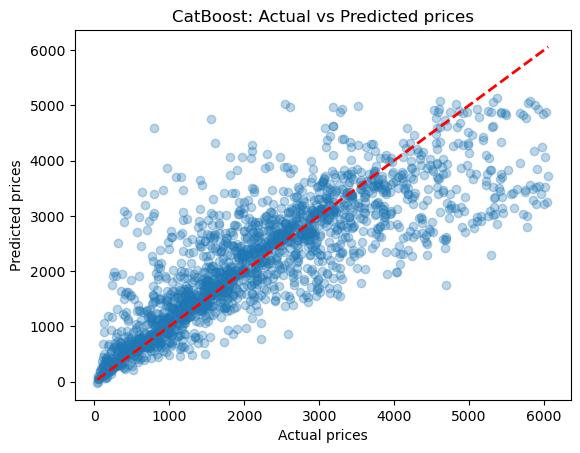

R-squared (testing data): 0.69


In [72]:
plt.scatter(y_test, y_pred_dt_test, alpha=0.3)
plt.plot ([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('CatBoost: Actual vs Predicted prices')
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

#Print R-square value
cb_rsquared_test_3 = r2_score(y_test, y_pred_dt_test)
print('R-squared (testing data): %.2f' % cb_rsquared_test_3)


<div class="alert alert-block alert-info">
<b>Observation</b> <br>
In this visualization, we can observe the model's performance. Upon examining the R-squared values in our testing data, we notice that some points deviate from the red line. However, overall, the majority of points presents satisfactory performance with this model.
</div>


# Testing

In [73]:
model_testing = pd.read_csv('model_testing.csv')

In [74]:
model_testing.head()

Item_Weight  Item_MRP  Outlet_Age  Item_Visibility_Normalized  \
0          3.0        23          30                        0.05   
1          2.0        10          40                        0.07   
2          1.5        50          15                        0.20   
3          5.0        20          25                        0.10   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                         1                         0                       0   
1                         0                         1                       0   
2                         0                         1                       0   
3                         1                         0                       0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0                 0                    0                 0  ...   
1                 0                    0                 0  ...   
2                 0                    0                 1  ...   
3                 1                    0                 0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                 1                   0                  0   
1                 0                   1                  0   
2                 0                   1                  0   
3                 0                   0                  1   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            0                            1   
1                            0                            0   
2                            0                            0   
3                            1                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          1   
1                            1                          0   
2                            1                          1   
3                            0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              0                              0   
1                              0                              1   
2                              0                              0   
3                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  

[4 rows x 32 columns]

In [75]:
scaler = MinMaxScaler()
numeric_columns = model_testing.select_dtypes(include=['float64', 'int64', 'int32']).columns
model_testing[numeric_columns] = scaler.fit_transform(model_testing[numeric_columns])

In [76]:
predictions = cb.predict(X)
predictions

array([3806.9454098 ,  469.58469264, 2162.40287208, ..., 1091.61935432,
       2152.65434046, 2418.9981058 ])

In [77]:
# Calling dataframe constructor
predictions_df = pd.DataFrame() 
# Function call
predictions_testing = cb.predict(model_testing)
predictions_df = pd.DataFrame(predictions_testing) 
predictions_df = pd.DataFrame({'Estimated_Sales': predictions_testing})
predictions_df

Estimated_Sales
0      1443.414135
1       963.482742
2      2224.311993
3      1292.106673

# Conclusion

### After a comprehensive analysis of our stores sales dataset, encompassing various preprocessing steps and the training and testing of diverse regression models, we have arrived at significant insights.

### In summary, our rigorous data preprocessing, model training, and evaluation processes have culminated in the identification of the CatBoost Regressor as the most effective model for predicting the best factors that influence sales in our stores. This conclusion is backed by thorough analyses of various performance metrics, affirming the model's reliability and accuracy in handling the complexities of our dataset.